# <center> Hypothesis IV :Interest Rate vs House Price

Data Source : https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp

In [50]:
#importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from pandas.plotting import lag_plot
from statsmodels.tsa.api import VAR

In [11]:
#importing interest rate dataset
df_int = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/Bank_Rate_history.xlsx')
df_int.head()

,Date,Rate
0,1975-01-20 00:00:00,11.25
1,1975-01-27 00:00:00,11.00
2,1975-02-10 00:00:00,10.75
3,1975-02-17 00:00:00,10.50
4,1975-03-10 00:00:00,10.25


In [12]:
# checking the statistics 
df_int.describe()

,Rate
count,244.000000
mean,9.208934
std,3.707317
min,0.100000
25%,6.250000
50%,9.880000
75%,11.880000
max,17.000000


We can see from the above table , that maximum Bank Rate is 17 whereas the minium is 0.10 with a mean of 9.208 and standard deviation of 3.70

In [13]:
#checking the shape of dataset
df_int.shape

(244, 2)

In [15]:
#checking the dtypes
df_int.dtypes

Date     object
Rate    float64
dtype: object

In [16]:
# converting the date object to datetime.
df_int['Date']= pd.to_datetime(df_int['Date'])

In [17]:
#checking the dataset's to and from dates
print("Starting date of Bank Rate Data :",df_int.Date.min())
print("Ending date of Bank Rate data :",df_int.Date.max())

Starting date of Bank Rate Data : 1975-01-20 00:00:00
Ending date of Bank Rate data : 2022-08-04 00:00:00


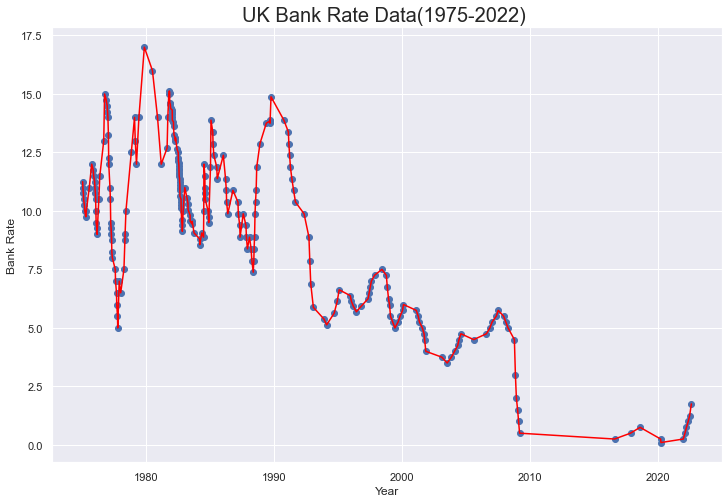

In [18]:
#plotting the GDP data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.lineplot(data = df_int, x='Date',y='Rate',err_style='bars',color='red')
plt.scatter(df_int['Date'],df_int['Rate'])
plt.title("UK Bank Rate Data(1975-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('Bank Rate')
plt.show()

In [25]:
# converting the dataset into monthly dataset 
df_int = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/Bank_Rate_history.xlsx',sheet_name='monthly')
df_int.head()

,Date,Rate
0,1975-01-01,11.00
1,1975-02-01,10.50
2,1975-03-01,10.00
3,1975-04-01,9.75
4,1975-05-01,10.00


In [36]:
#checking the dataset's to and from dates
print("Starting date of Bank Rate Data :",df_int.Date.min())
print("Ending date of Bank Rate data :",df_int.Date.max())

Starting date of Bank Rate Data : 1975-01-01 00:00:00
Ending date of Bank Rate data : 2022-08-01 00:00:00


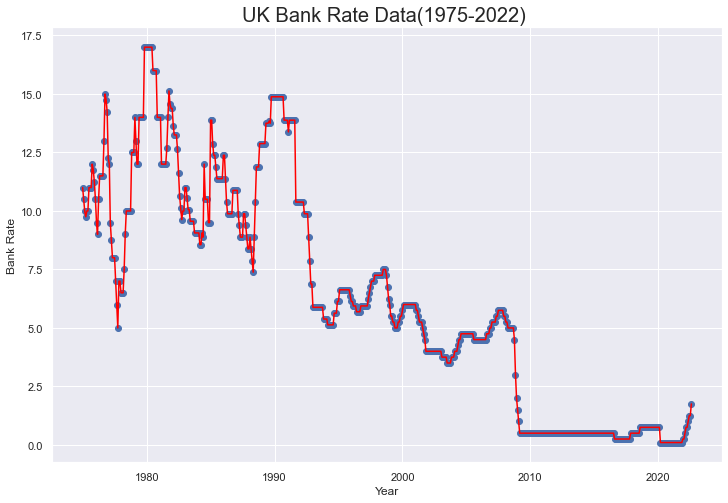

In [26]:
#plotting the Bank rate data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.lineplot(data = df_int, x='Date',y='Rate',err_style='bars',color='red')
plt.scatter(df_int['Date'],df_int['Rate'])
plt.title("UK Bank Rate Data(1975-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('Bank Rate')
plt.show()

In [29]:
# importing the dataset for UK house prices from ONS
df_HP = pd.read_csv(r'C:/Users/hp/dissertation/Datasets/Average-prices-2022-05_ONS.csv')
#since the region_name contains all the regions, we would take the region_name as United Kingdom
df_HP = df_HP[df_HP.Region_Name=='United Kingdom']
#we require only the date and average_price
df_HP = df_HP[['Date','Average_Price']]
df_HP.head()

,Date,Average_Price
9,1968-04-01,3594.602239
19,1968-05-01,3594.602239
29,1968-06-01,3594.602239
39,1968-07-01,3716.453163
49,1968-08-01,3716.453163


In [30]:
# checking the statistics 
df_HP.describe()

,Average_Price
count,650.000000
mean,92682.855832
std,79576.598379
min,3594.602239
25%,21506.687970
50%,58249.724790
75%,167885.249350
max,283496.357300


We can see from the above table , that maximum Bank Rate is 283496.357 whereas the minium is 3594.60 with a mean of 92682.85 and standard deviation of 79576.59

In [31]:
#checking the shape of dataset
df_HP.shape

(650, 2)

In [32]:
#checking the dataset's to and from dates
print("Starting date of House Price Data :",df_HP.Date.min())
print("Ending date of House Price data :",df_HP.Date.max())

Starting date of House Price Data : 1968-04-01
Ending date of House Price data : 2022-05-01


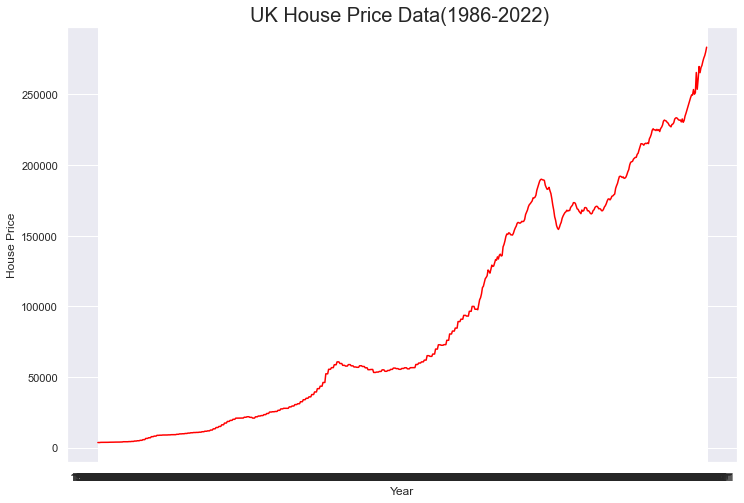

In [35]:
#plotting the House Price data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.lineplot(data = df_HP, x='Date',y='Average_Price',err_style='bars',color='red')
plt.title("UK House Price Data(1986-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('House Price')
plt.show()

In [37]:
#since the starting and end dates mismatch among datasets , thus slicing the HP dataset
df_HP = df_HP[df_HP.Date>='1975-01-01']
df_HP

,Date,Average_Price
819,1975-01-01,9179.436227
829,1975-02-01,9179.436227
839,1975-03-01,9179.436227
849,1975-04-01,9423.138074
859,1975-05-01,9423.138074
...,...,...
135249,2022-01-01,273456.582300
135670,2022-02-01,275790.515100
136091,2022-03-01,277525.398100
136512,2022-04-01,280084.228600


In [44]:
# combing both the datasets
df_all = pd.DataFrame()
df_all[['Date','HP']]= df_HP[['Date','Average_Price']]
df_all['Rate']=df_int['Rate'][:-3].values
df_all

,Date,HP,Rate
819,1975-01-01,9179.436227,11.00
829,1975-02-01,9179.436227,10.50
839,1975-03-01,9179.436227,10.00
849,1975-04-01,9423.138074,9.75
859,1975-05-01,9423.138074,10.00
...,...,...,...
135249,2022-01-01,273456.582300,0.25
135670,2022-02-01,275790.515100,0.50
136091,2022-03-01,277525.398100,0.75
136512,2022-04-01,280084.228600,0.75


In [45]:
#calculating the percentage change of both the HP and Rate
df_all['%change_HP'] =df_all['HP'].pct_change()
df_all['%change_Rate'] =df_all['Rate'].pct_change()
df_all.fillna(0,inplace=True)
df_all.head()

,Date,HP,Rate,%change_HP,%change_Rate
819,1975-01-01,9179.436227,11.00,0.000000,0.000000
829,1975-02-01,9179.436227,10.50,0.000000,-0.045455
839,1975-03-01,9179.436227,10.00,0.000000,-0.047619
849,1975-04-01,9423.138074,9.75,0.026549,-0.025000
859,1975-05-01,9423.138074,10.00,0.000000,0.025641


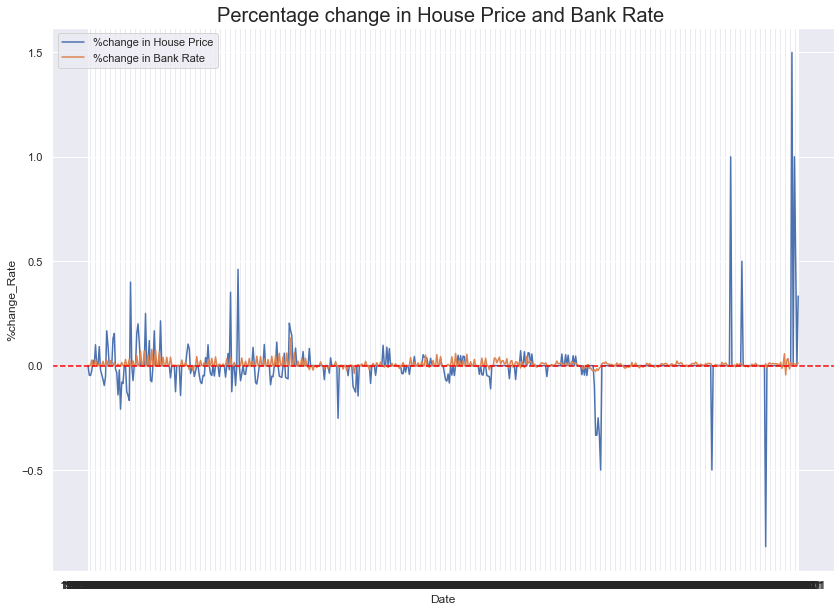

In [49]:
#plotting the percentage change together of both house price and Rate
plt.subplots(figsize=(14, 10))
sns.lineplot(data=df_all,x='Date',y='%change_Rate',label='%change in House Price')
sns.lineplot(data=df_all,x='Date',y='%change_HP',label='%change in Bank Rate')
plt.axhline(0, ls='--',c='red')
plt.legend()
plt.title("Percentage change in House Price and Bank Rate ",fontdict={'fontsize': 20})
plt.show()

We can see in the above chart that percentage change in house prices is much more than the percentage change in bank rate.

### Performing Granger-Causality Test 
Source :https://rishi-a.github.io/2020/05/25/granger-causality.html

The Granger Causality test is used to determine whether or not one time series is useful for forecasting another.
This test uses the following null and alternative hypotheses:

<b>Null Hypothesis (H0):</b> Time series Bank Rate does not Granger-cause time series HP

<b>Alternative Hypothesis (HA):</b> Time series Bank Rate Granger-causes time series HP

The term “Granger-causes” means that knowing the value of time series x at a certain lag is useful for predicting the value of time series y at a later time period.
This test produces an F test statistic with a corresponding p-value. If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.

Step 1: Test each of the time-series to determine their order of integration. Ideally, this should involve using a test (such as the ADF test) for which the null hypothesis is non-stationarity.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


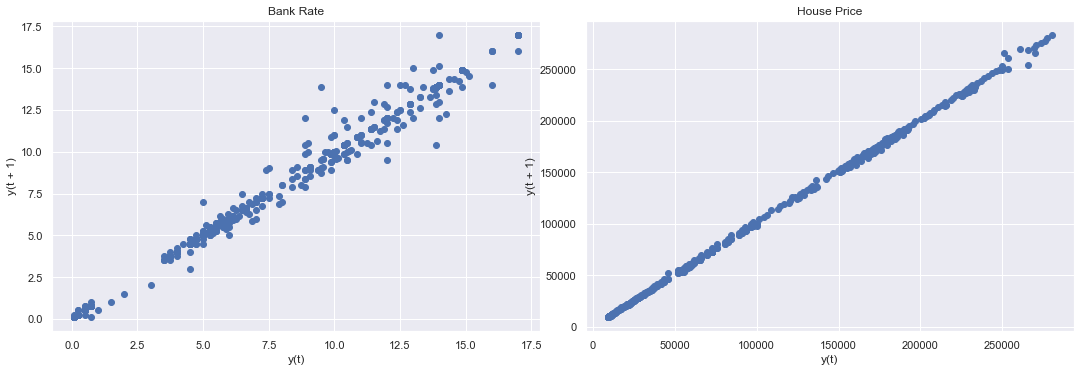

In [51]:
#plotting the lag_plots for Bank rate and HP
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout()
lag_plot(df_all['Rate'], ax=axes[0])
axes[0].set_title('Bank Rate')
lag_plot(df_all['HP'], ax=axes[1])
axes[1].set_title('House Price')
plt.show()

we Can see that both the time series have high autocorrelation.

In [52]:
# differencing the data
df1 = df_all.copy()
df_all['Rate'] = df_all['Rate']- df_all['Rate'].shift(1)
df_all['HP'] = df_all['HP']- df_all['HP'].shift(1)
df_all = df_all.dropna()
df_all

,Date,HP,Rate,%change_HP,%change_Rate
829,1975-02-01,0.000000,-0.50,0.000000,-0.045455
839,1975-03-01,0.000000,-0.50,0.000000,-0.047619
849,1975-04-01,243.701847,-0.25,0.026549,-0.025000
859,1975-05-01,0.000000,0.25,0.000000,0.025641
869,1975-06-01,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...
135249,2022-01-01,2917.312100,0.00,0.010783,0.000000
135670,2022-02-01,2333.932800,0.25,0.008535,1.000000
136091,2022-03-01,1734.883000,0.25,0.006291,0.500000
136512,2022-04-01,2558.830500,0.00,0.009220,0.000000


In [53]:
#defining a function for dicky fuller test
def adfuller_test(columns):
    result=adfuller(columns)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [54]:
#applying Dickey Fulle test on Bank rate
adfuller_test(df_all['Rate'])

ADF Test Statistic : -20.301833325067143
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 567
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [55]:
#applying Dickey Fulle test on House Price
adfuller_test(df_all['HP'])

ADF Test Statistic : -3.3636461382694116
p-value : 0.012262391004210095
#Lags Used : 19
Number of Observations Used : 548
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


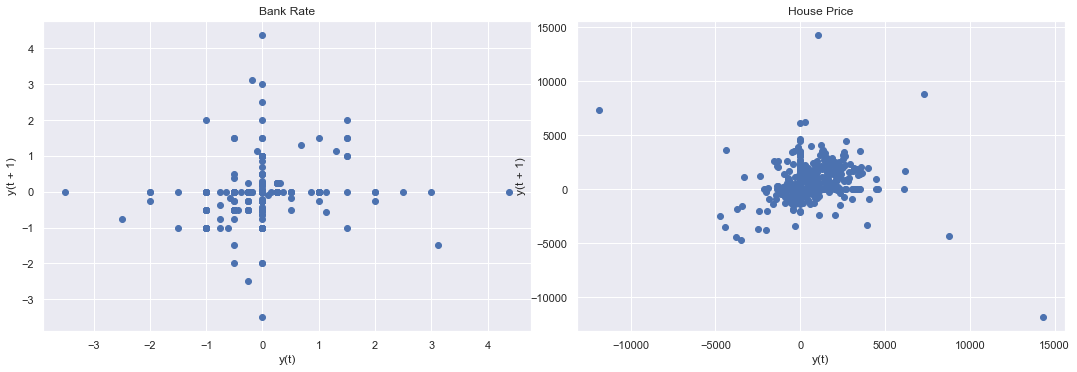

In [56]:
#plotting the lag_plots for Bank rate and HP
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout()
lag_plot(df_all['Rate'], ax=axes[0])
axes[0].set_title('Bank Rate')
lag_plot(df_all['HP'], ax=axes[1])
axes[1].set_title('House Price')
plt.show()

##### We can see from above tests that ADF Null Hypothesis is rejected: thus data is stationary.Moreover , the above lag plots give confirmation that the data is stationary

Step 2: Let the maximum order of integration for the group of time-series be m. So, if there are two time-series and one is found to be I(1) and the other is I(2), then m = 2. If one is I(0) and the other is I(1), then m = 1, etc.
Result: We saw above that for our case m = 1

Step 3: Set up a VAR model in the levels of the data, regardless of the orders of integration of the various time-series. Most importantly, you must not difference the data, no matter what you found at Step 1.//

Step 4: Determine the appropriate maximum lag length for the variables in the VAR, say p, using the usual methods. Specifically, base the choice of p on the usual information criteria, such as AIC, SIC.

In [57]:
# applying VAR model and finding the AIC, BIC
df1 = df1.dropna()
model = VAR(df1[['Rate','HP']]) #recall that rawData is w/o difference operation
for i in range(1,13):
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        
    except:
        continue

Lag Order = 1
AIC :  13.43081932206397
BIC :  13.476686801839193
Lag Order = 2
AIC :  13.402865650608215
BIC :  13.479415197411173
Lag Order = 3
AIC :  13.406421212783485
BIC :  13.513736260654234
Lag Order = 4
AIC :  13.177204925879442
BIC :  13.31536928545579
Lag Order = 5
AIC :  13.189284368812858
BIC :  13.358382229686896
Lag Order = 6
AIC :  13.200047205667667
BIC :  13.400163138761153
Lag Order = 7
AIC :  13.17367487873984
BIC :  13.404893838698579
Lag Order = 8
AIC :  13.191344032526278
BIC :  13.453751360133714
Lag Order = 9
AIC :  13.199686531257813
BIC :  13.493367955868008
Lag Order = 10
AIC :  13.15260418838588
BIC :  13.477645830376066
Lag Order = 11
AIC :  13.1541093745321
BIC :  13.510597747775003
Lag Order = 12
AIC :  13.17063271248393
BIC :  13.55865472684006


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Result: The lag-order p = 10 on the basis of Akaike Information Criterion (AIC)

In [67]:
#perform Granger-Causality test 
grangercausalitytests(df_all[['HP','Rate']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4847  , p=0.2235  , df_denom=564, df_num=1
ssr based chi2 test:   chi2=1.4926  , p=0.2218  , df=1
likelihood ratio test: chi2=1.4907  , p=0.2221  , df=1
parameter F test:         F=1.4847  , p=0.2235  , df_denom=564, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0698  , p=0.3438  , df_denom=561, df_num=2
ssr based chi2 test:   chi2=2.1587  , p=0.3398  , df=2
likelihood ratio test: chi2=2.1546  , p=0.3405  , df=2
parameter F test:         F=1.0698  , p=0.3438  , df_denom=561, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1742  , p=0.9138  , df_denom=558, df_num=3
ssr based chi2 test:   chi2=0.5292  , p=0.9124  , df=3
likelihood ratio test: chi2=0.5289  , p=0.9125  , df=3
parameter F test:         F=0.1742  , p=0.9138  , df_denom=558, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3246  , p=0.8615  

{1: ({'ssr_ftest': (1.4847382820375674, 0.2235440826155682, 564.0, 1),
   'ssr_chi2test': (1.492635826090959, 0.22180794650042257, 1),
   'lrtest': (1.4906745744865475, 0.22211182530371393, 1),
   'params_ftest': (1.4847382820375719, 0.2235440826155682, 564.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.069816855342166, 0.3437701868130229, 561.0, 2),
   'ssr_chi2test': (2.158703529852642, 0.3398157347414453, 2),
   'lrtest': (2.154597358472529, 0.34051412224307415, 2),
   'params_ftest': (1.0698168553421747, 0.3437701868129909, 561.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.17421220160104614, 0.9138412849317383, 558.0, 3),
   'ssr_chi2test': (0.5291929779816724, 0.9124325947240187, 3),
   'lrtest': (0.5289453050027078, 0.9124877591372796, 3),
   'params_ftest': (0.174212201601041, 0.9138412849317383, 558.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

#### The F test statistic turns out to be 1.6911  and the corresponding p-value is 0.0795 for lag=10<br/><br/>
### Since the p-value is more than .05,we can accept the null hypothesis of the test and conclude that knowing the Bank rate is not useful for predicting the future House Prices.

In [69]:
#perform Granger-Causality test on the reverse
grangercausalitytests(df_all[['Rate','HP']], maxlag=[10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.1592  , p=0.3160  , df_denom=537, df_num=10
ssr based chi2 test:   chi2=12.0453 , p=0.2820  , df=10
likelihood ratio test: chi2=11.9171 , p=0.2906  , df=10
parameter F test:         F=1.1592  , p=0.3160  , df_denom=537, df_num=10


{10: ({'ssr_ftest': (1.1591961839679512, 0.3160324131523928, 537.0, 10),
   'ssr_chi2test': (12.045278783130666, 0.2820375925164295, 10),
   'lrtest': (11.917112118736327, 0.29064219595800267, 10),
   'params_ftest': (1.1591961839674083, 0.3160324131527695, 537.0, 10.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          

#### Since the p-value is more than .05,we can accept the null hypothesis of the test and conclude that knowing the House Prices is not useful for predicting the future Bank Rate.

### However studies suggest ,The impact of a rise in interest rates on housing prices will depend on the size and timing of the rise, as well as the supply of available property – with properties in short supply, the current high demand ensures prices remain elevated.

